<a href="https://colab.research.google.com/github/dhanushpachabhatla/my-machine-learning-notes/blob/main/logistic_regression_evolution_from_scrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Perceptron solution

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [12]:
import pandas as pd

In [14]:
XX = pd.DataFrame(X,columns=['x1','x2'])
XX

,x1,x2
0,0.823215,-0.116976
1,0.375148,-0.731152
2,0.269478,-0.708106
3,-4.987449,-2.011992
4,0.423128,1.634932
...,...,...
95,-5.519911,0.661988
96,-4.932582,0.071533
97,-4.856931,0.323236
98,1.460234,-0.345742


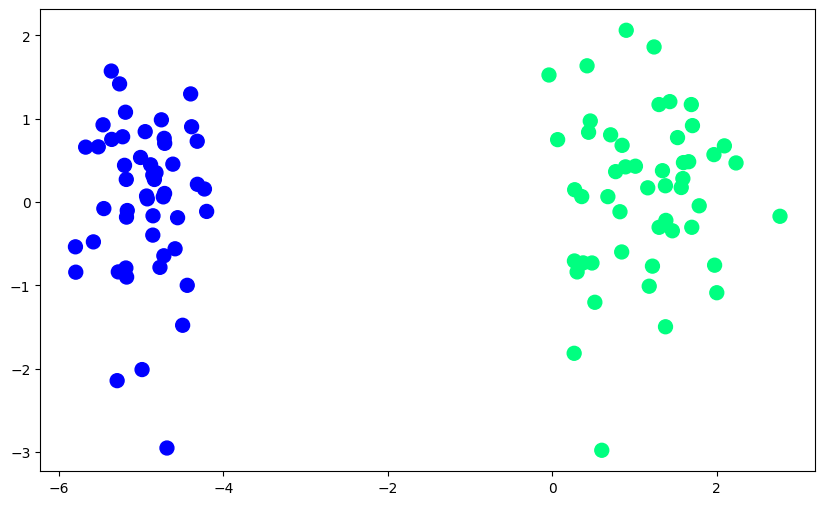

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

* definition of basic perceptron in logistic regression

In [15]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


In [16]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [17]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

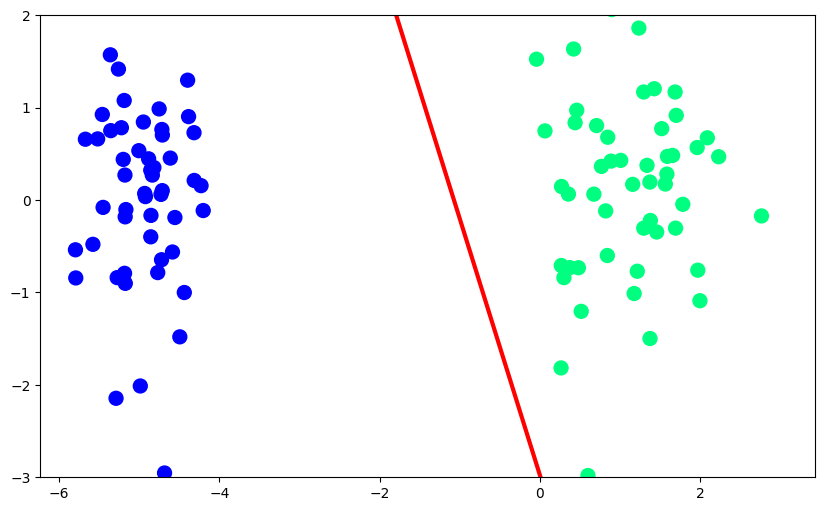

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [19]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [26]:
print(lor.coef_)
print(lor.intercept_)

[[1.77255101 0.01190507]]
[3.54700273]


In [20]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

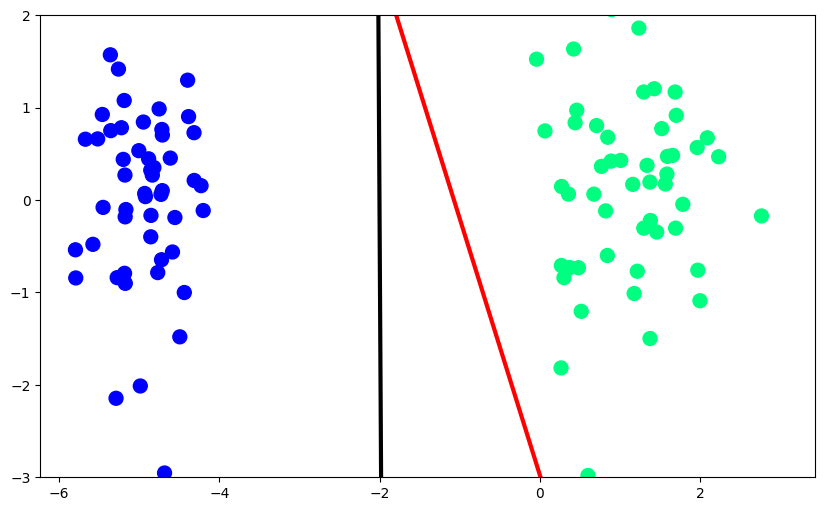

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

* as you can see there is still much difference between our model and scikit learn model?? why ??
* need to introduce sigmoid function to calculate probabilities and to get involvement of all points
* so points on right side push and on wrong side pull by some magnitude called z = sigmoid( sigma i = 1 to n : wi*xi)

# Sigmoid solution

In [22]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [23]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [24]:
intercept_,coef_ = perceptron(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

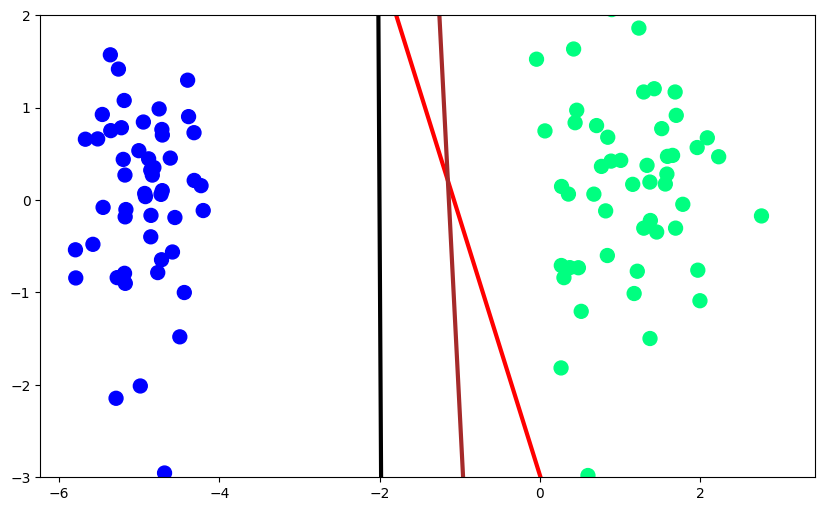

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

* but still not close to optimal solution so we need to introduce loss function
and its application through gradient descent

#Gradeint descent soluion

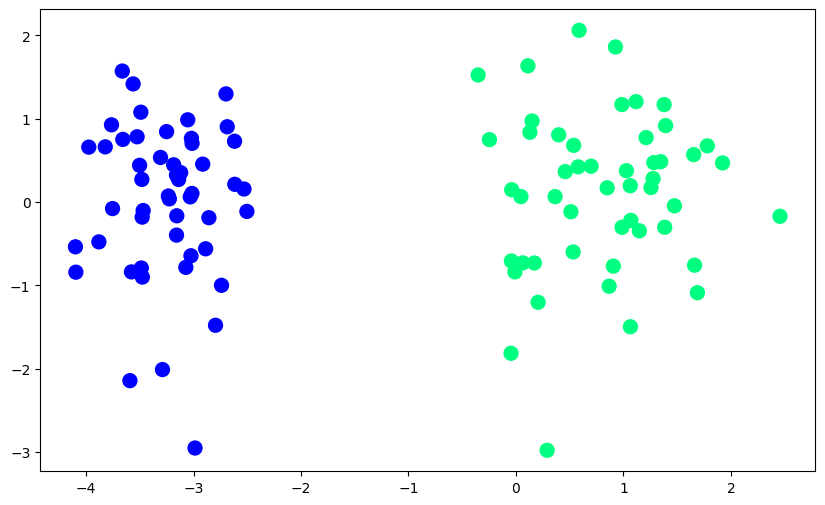

In [34]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [36]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [37]:
print(lor.coef_)
print(lor.intercept_)

[[4.85216849 0.22901007]]
[5.81368328]


In [38]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [39]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

* gradient descent in log reg definintion

In [40]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [31]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [41]:
coef_,intercept_ = gd(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

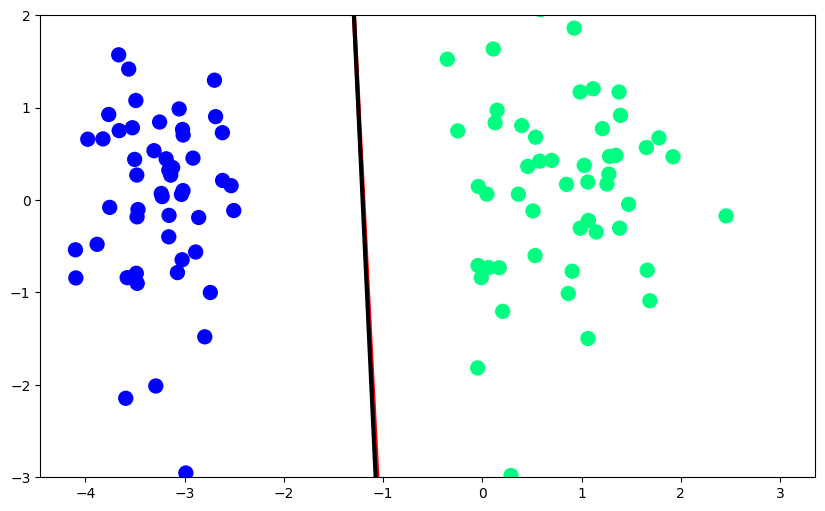

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

* as you can see its much similar to optimum model